# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [5]:
#import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. We will load the dataset below.

In [2]:
# Run this code:

kickstarter = pd.read_csv('../ks-projects-201801.csv')

Now print the `head` function to examine the dataset.

In [3]:
# Your code here:
kickstarter.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column.

# - how to use stats package

In [13]:
from scipy import stats
country=np.asarray(kickstarter["country"])
currency=np.asarray(kickstarter["currency"])

In [14]:
stats.mode(country)

ModeResult(mode=array(['US'], dtype=object), count=array([292627]))

In [15]:
stats.mode(currency)

ModeResult(mode=array(['USD'], dtype=object), count=array([295365]))

The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

# - how to deliver the percentile of a column with numpy
- find the percentile
- use stmean(array, (interval_min,interval_max(percentiles))

In [22]:
goal=np.asarray(kickstarter["goal"])
percentil=np.percentile(goal,75)

In [25]:
stats.tmean(goal, (0,percentil))

4874.150287106898

#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, click [here](https://en.wikipedia.org/wiki/Fisher%27s_exact_test).

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

# - Create another column based on conditions using where: Cool
https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/

In [26]:
kickstarter["goal_met"]=np.where(
    kickstarter["usd_pledged_real"]>kickstarter["usd_goal_real"],
    1,0)
# si una columna a es mayor que otra b pone un 1, else 0

Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

# - Checking columns under condition

In [31]:
kickstarter["usd"]=np.where(
    kickstarter["currency"]=="USD",1,0)

Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

# - Correlation / contingency table. Important stuff

In [41]:
crosstab=pd.crosstab(kickstarter["goal_met"],kickstarter["usd"],dropna=True)
# y mola un viaje
crosstab

usd,0,1
goal_met,,
0,58685,187130
1,24611,108235


In [42]:
crosstab.T[0]

usd
0     58685
1    187130
Name: 0, dtype: int64

# - fisher_exact output: Para ver cómo de correlacionados están los datos de una gráfica. Independientemente de si traspones la matriz o no da el mismo resultado (lógico)
- 0 = los datos están muy relacionados
- 1 = los datos NO están muy relacionados

In [58]:
oddsratio, pvalue = stats.fisher_exact(crosstab.T)

In [59]:
pvalue

9.78e-321

In [60]:
oddsratio

1.3791838163150314

In [61]:
oddsratio, pvalue = stats.fisher_exact(crosstab)

In [49]:
pvalue

In [62]:
oddsratio

1.3791838163150314

# Challenge 2 - The `linalg` submodule

This submodule allows us to perform various linear algebra calculations. 

Using the solve function, find the solution of the equation system 5x + 2y = 3 and 3x + y = 2 in the cell below.

# Resolver ecuaciones
- a=np.array([],[],[]) , esto es un 3x3
- b=np.array([]) esto son 3 números en una lista (la solución del 3x3)

x=linalg.solve(a,b) te mete x en a, lo iguala a b y te da la solución

In [67]:
ecuation=np.array([[5,2],[3,1]])
equality=np.array([3,2])
matrix_vector=np.linalg.solve(ecuation,equality)

In [68]:
matrix_vector

array([ 1., -1.])

# - The `interpolate` submodule

- This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In [65]:
# Your code here:
from scipy.interpolate import interp1d, interp2d

In [66]:
kickstarter.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,0,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,0,1
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,1,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,1,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,0,1
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,0,1
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,0,1


Next, create a linear interpolation of the backers as a function of `usd_pledged_real`. Create a function `f` that generates a linear interpolation of backers as predicted by the amount of real pledged dollars.

# Interpolating

Mis ejes iniciales
- x = np.arange(1,10)
- y = np.arange(1,10)
- plt.plot(x,y,'-o')

Mi interpolación
- nuevo eje x:
    x1 = np.arange(1,9,0.5)
- nuevo eje y(sobre el que interpolo
    f = interp1d(x,y)

y1 = f(x1)
plt.plot(x1,1+y1,'-o')

In [79]:
import matplotlib.pyplot as plt

the old axis which we'll use

In [163]:
x = np.asarray(kickstarter["backers"][0:10])
y = np.asarray(kickstarter["usd_pledged_real"][0:10])

creating the new x and y
- use np.arange. its useful

In [164]:
x_new=np.arange(min(x),max(x),10)
g=interp1d(x,y)

plotting

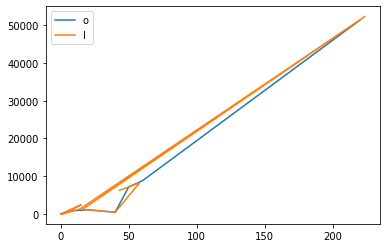

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, g(x_new))
plt.legend("interpolation")
plt.plot(x,y)
plt.legend("old measure")

# Interp1d para realizar ajustes de cualquier tipo
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
- la función y será la que realice el ajuste que desees

In [173]:
# vieja función
x = np.asarray(kickstarter["backers"]) # old x
y = np.asarray(kickstarter["usd_pledged_real"]) # old y

In [178]:
'''x_new=np.arange(min(x),max(x),10)
g=interp1d(x, y, kind="cubic")
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, g(x_new))
plt.legend("interpolation")
plt.plot(x,y)
plt.legend("old measure")


'''

"no he conseguido realizarlo, pero lo haré en algún momento"

'no he conseguido realizarlo, pero lo haré en algún momento'

# lets try interp2d. Interpoltion in a 2D frame (no es un ajuste cuadrático)
- según he entendido, hay que crear un meshgrid, que evaluará todos los puntos de la función z
- la función z es el ajuste que vamos a realizar. IMP! Sus elementos tienen que ser un numpy 

In [161]:
from scipy.interpolate import interp2d
x = np.asarray(kickstarter["backers"][0:30]) # old x
y = np.asarray(kickstarter["usd_pledged_real"][0:30]) # old y
X, Y = np.meshgrid(x, y) # hay que crearlo

z=np.array(Y)-np.array(X)**4-np.array(X)**3-np.array(X)**2-np.array(X)-3
f=interp2d(x,y,z)


En geometría 2D

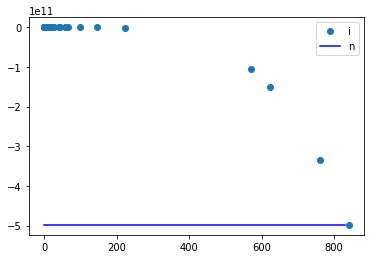

In [162]:
x_new=np.arange(min(x),max(x),10)
y_new=np.arange(min(x),max(x),10)
z_new=f(x_new,y_new)

plt.plot(x, z[0, :], 'o', x_new, z_new[0, :], 'b')
plt.legend("interpolation")
plt.show()

# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](https://en.wikipedia.org/wiki/Binomial_distribution) and about the `binom` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

In the cell below, compute the probability that a die lands on 5 exactly 3 times in 8 tries.

Hint: the probability of rolling a 5 is 1/6.

# newtown stuff:
- p == probability value of what you want
- k == success
- n == trials
binom.pmf(k, n, p, loc)
loc: a shifter parameter. check out the documentation

In [181]:
from scipy.stats import binom
binom.pmf(3, 8, 1/6)

0.10419048163389728